# Problem Definition
Use sklearn model to predict gdp of a country

## Load libraries

In [28]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

sns.set_style('whitegrid')

## Load the data

In [29]:
#import data set
df_train = pd.read_csv('/Users/jacobjablonski/Documents/Education/Concordia/Big Data Diploma/CEBD 1260/Final Project/Data/Processed/train.csv')
print(df_train.shape)

(45407, 6)


## Feature Eng.


In [30]:
# Check for missing values
df_train.isnull().sum(axis = 0)

Unnamed: 0         0
life_expectancy    0
co2_per_capita     0
fertility_rate     0
merch_export       0
gdp                0
dtype: int64

In [49]:
# select the columns
X_columns = ['life_expectancy', 'co2_per_capita', 'fertility_rate', 'merch_export']
y_column = ['gdp']

In [72]:
threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (36325, 4)
y_train (36325, 1)
X_test (9082, 4)
y_test (9082, 1)


In [76]:
model = LinearRegression()
#model.fit(X_train, y_train.ravel())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

MAE 1812.14
RMSE 6096.46


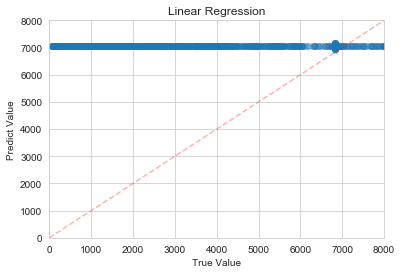

In [78]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('MAE', round(mae, 2))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.xlim([0, 8000])
plt.ylim([0, 8000])
plt.show()

In [79]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [80]:
joblib.dump(X_columns, 'X_columns.joblib')

['X_columns.joblib']